### **SVM on Image Classification**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import load_digits

In [10]:
digits = load_digits()
print('Digits dataset keys \n{}'.format(digits.keys()))

Digits dataset keys 
dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


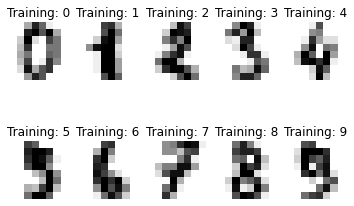

In [14]:
for i in range(0,10):
    plt.subplot(2, 5, i+1)
    plt.axis('off')
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: {}'.format(digits.target[i]))
plt.show()

In [15]:
n_samples = len(digits.images)
data_images = digits.images.reshape((n_samples, -1))

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(data_images, digits.target, test_size=0.4, random_state=0)
SVM = svm.SVC(gamma=0.001)
SVM.fit(X_train, Y_train)
Y_pred = SVM.predict(X_test)

In [26]:
predicted_df = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
predicted_df

,Actual,Predicted
0,2,2
1,8,8
2,2,2
3,6,6
4,6,6
...,...,...
714,7,7
715,5,5
716,2,2
717,7,7


In [27]:
from sklearn import metrics

Confusion matrix:
[[60  0  0  0  0  0  0  0  0  0]
 [ 0 73  0  0  0  0  0  0  0  0]
 [ 0  1 69  0  0  0  0  1  0  0]
 [ 0  0  0 70  0  0  0  0  0  0]
 [ 0  0  0  0 63  0  0  0  0  0]
 [ 0  0  0  0  0 87  1  0  0  1]
 [ 0  0  0  0  0  0 76  0  0  0]
 [ 0  0  0  0  0  0  0 65  0  0]
 [ 0  1  0  0  0  0  0  0 77  0]
 [ 0  0  0  0  0  0  0  0  0 74]]


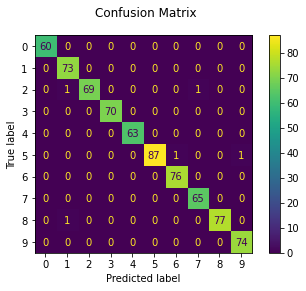

In [28]:
disp = metrics.plot_confusion_matrix(SVM, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [31]:
print("Classification Report for SVM: \n", metrics.classification_report(Y_test, Y_pred))

Classification Report for SVM: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.97      1.00      0.99        73
           2       1.00      0.97      0.99        71
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        63
           5       1.00      0.98      0.99        89
           6       0.99      1.00      0.99        76
           7       0.98      1.00      0.99        65
           8       1.00      0.99      0.99        78
           9       0.99      1.00      0.99        74

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719

